# Top 5 Mobile Brands Amazon Project

In this project, we will analyze a dataset containing 1900+ details of the Top five smartphone brands of India (Apple, Samsung, Xiaomi, Oppo, Vivo) listed on amazon containing necessary details such as product description, Price, Rating, ReviewCount, and Url.

We will start by importing the data, putting it into a Pandas DataFrame, cleaning it, and finally doing some exploratory data analysis.

### 1 - Import and Cleaning the Data

In [1425]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top = pd.read_csv('Amazon_top5_mobilephones.csv')

In [1426]:
top.head()

,Description,Price,Rating,ReviewCount,Url
0,Apple iPhone 13 (128GB) - Pink,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
1,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5 out of 5 stars,"1,341",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
2,Apple iPhone 12 (128GB) - Green,55999,4.5 out of 5 stars,"4,941",https://www.amazon.in//New-Apple-iPhone-12-128...
3,Apple iPhone 12 (64GB) - Green,48900,4.6 out of 5 stars,"1,299",https://www.amazon.in//New-Apple-iPhone-12-64G...
4,Apple iPhone 13 (128GB) - Green,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//Apple-iPhone-13-128GB-G...


In [1427]:
top.shape

(1903, 5)

The dataset contains 5 columns and 1,903 rows.

In [1428]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1903 non-null   object
 1   Price        1903 non-null   int64 
 2   Rating       1881 non-null   object
 3   ReviewCount  1903 non-null   object
 4   Url          1903 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.5+ KB


We can see that we have some missing values, and that some columns are in the wrong datatypes, so let's do some data cleaning.

In [1429]:
top.columns

Index(['Description', 'Price', 'Rating', 'ReviewCount', 'Url'], dtype='object')

In [1430]:
top.columns = top.columns.str.lower()
top = top.dropna().copy()

rating = top.rating.str.split(' ').str[0]
top.rating = rating
top.rating = top.rating.astype('float')
top.rating.unique()



array([4.6, 4.5, 4. , 4.2, 4.1, 3.9, 3.7, 5. , 0. , 4.3, 3.3, 3. , 3.4,
       3.5, 3.8, 3.2, 3.6, 2. ])

In [1431]:
reviewcount = top.reviewcount.str.replace(',', '')
top.reviewcount = reviewcount
top.reviewcount.unique()

array(['7507', '1341', '4941', '1299', '130', '55461', '72', '1492',
       '3354', '4520', '12588', '772', '18423', '82', '7251', '53216',
       '124', '25090', '455', '5', '59745', 'No reviews', '23725',
       '85659', '5218', '3', '40', '1274', '86', '2247', '287', '304898',
       '31010', '57583', '9323', '30', '27', '106', '9426', '22491',
       '1929', '6', '340', '39', '28', '92', '14', '7', '241', '458',
       '292', '4302', '923', '1'], dtype=object)

In [1432]:
top.reviewcount = top.reviewcount.str.replace('New to Amazon', '0')
top.reviewcount = top.reviewcount.str.replace('No reviews', '0')
top.reviewcount = top.reviewcount.astype('int')
top.reviewcount.unique()

array([  7507,   1341,   4941,   1299,    130,  55461,     72,   1492,
         3354,   4520,  12588,    772,  18423,     82,   7251,  53216,
          124,  25090,    455,      5,  59745,      0,  23725,  85659,
         5218,      3,     40,   1274,     86,   2247,    287, 304898,
        31010,  57583,   9323,     30,     27,    106,   9426,  22491,
         1929,      6,    340,     39,     28,     92,     14,      7,
          241,    458,    292,   4302,    923,      1])

In [1433]:
top['brand'] = top['description'].apply(lambda x : 'Samsung' if 'SAMSUNG' in x or 'Samsung' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Vivo' if 'vivo' in x or 'Vivo' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Oppo' if 'OPPO' in x or 'Oppo' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Xiaomi ' if 'Xiaomi ' in x or 'Mi ' in x or 'MI ' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Apple' if 'Apple' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Lava' if 'Lava' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'Redmi' if 'Redmi' in x else x)
top['brand'] = top['brand'].apply(lambda x : 'IKALL' if 'IKALL' in x else x)

renewed_brand = top[top.brand.str.contains('(?:Renewed)')].copy()
renewed_brand.brand = renewed_brand.brand.str.split(' ').str[1]

top.update(renewed_brand)
top.brand.unique()

array(['Apple', 'Samsung', 'Lava', 'Redmi', 'Xiaomi ', 'Oppo', 'Vivo',
       'IKALL'], dtype=object)

In [1434]:
top.columns

Index(['description', 'price', 'rating', 'reviewcount', 'url', 'brand'], dtype='object')

In [1435]:
top = top[['brand', 'description', 'price', 'rating', 'reviewcount', 'url']]
top.head()

,brand,description,price,rating,reviewcount,url
0,Apple,Apple iPhone 13 (128GB) - Pink,65999,4.6,7507,https://www.amazon.in//sspa/click?ie=UTF8&spc=...
1,Apple,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5,1341,https://www.amazon.in//sspa/click?ie=UTF8&spc=...
2,Apple,Apple iPhone 12 (128GB) - Green,55999,4.5,4941,https://www.amazon.in//New-Apple-iPhone-12-128...
3,Apple,Apple iPhone 12 (64GB) - Green,48900,4.6,1299,https://www.amazon.in//New-Apple-iPhone-12-64G...
4,Apple,Apple iPhone 13 (128GB) - Green,65999,4.6,7507,https://www.amazon.in//Apple-iPhone-13-128GB-G...


In [1436]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1902
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1881 non-null   object 
 1   description  1881 non-null   object 
 2   price        1881 non-null   int64  
 3   rating       1881 non-null   float64
 4   reviewcount  1881 non-null   int32  
 5   url          1881 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 95.5+ KB


Now the data is clean and the columns are in the correct datatypes, we can proceed with the analysis.

### 2 - Exploratory Data Analysis

Let's start with some descriptive statistics.

In [1437]:
top.describe(include='all')

,brand,description,price,rating,reviewcount,url
count,1881,1881,1881.000000,1881.000000,1881.000000,1881
unique,8,91,NaN,NaN,NaN,1881
top,Samsung,"Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...",NaN,NaN,NaN,https://www.amazon.in//sspa/click?ie=UTF8&spc=...
freq,440,41,NaN,NaN,NaN,1
mean,NaN,NaN,27927.048910,4.028177,14753.665603,NaN
std,NaN,NaN,23029.375164,0.606659,35262.708585,NaN
min,NaN,NaN,5224.000000,0.000000,0.000000,NaN
25%,NaN,NaN,12660.000000,4.000000,82.000000,NaN
50%,NaN,NaN,18499.000000,4.100000,2247.000000,NaN
75%,NaN,NaN,32999.000000,4.300000,12588.000000,NaN


Now let's look at which brand has the highest number of smartphone models available in this dataset, as well as the brand with the least number.

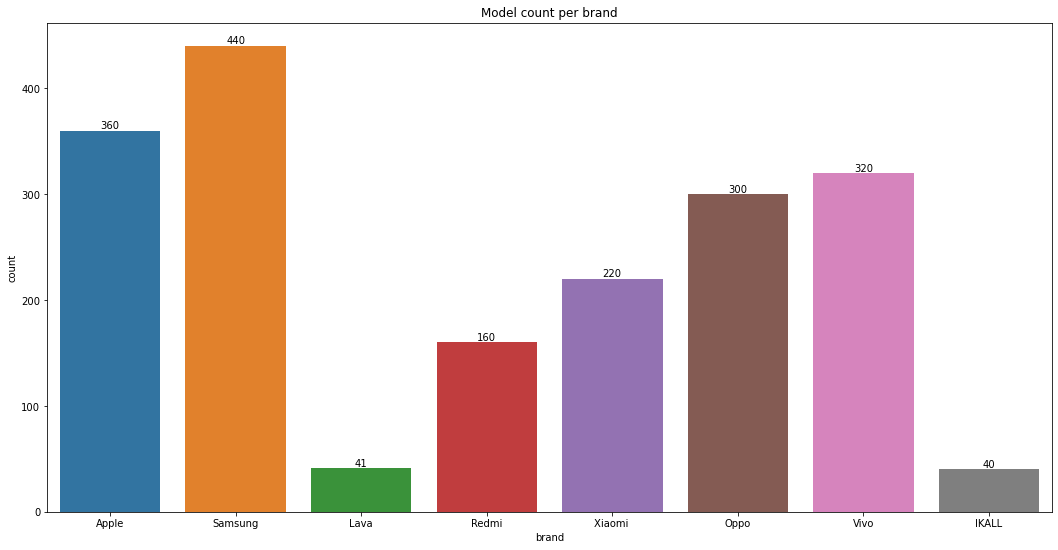

<Figure size 432x288 with 0 Axes>

In [1438]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='brand', data=top)
ax.bar_label(ax.containers[0])
plt.title("Model count per brand")
plt.show()
plt.clf()

Samsung has the most smartphones with 440 models, while IKALL has the least with only 40.

Now let's check the price distrubution for all smartphone models.

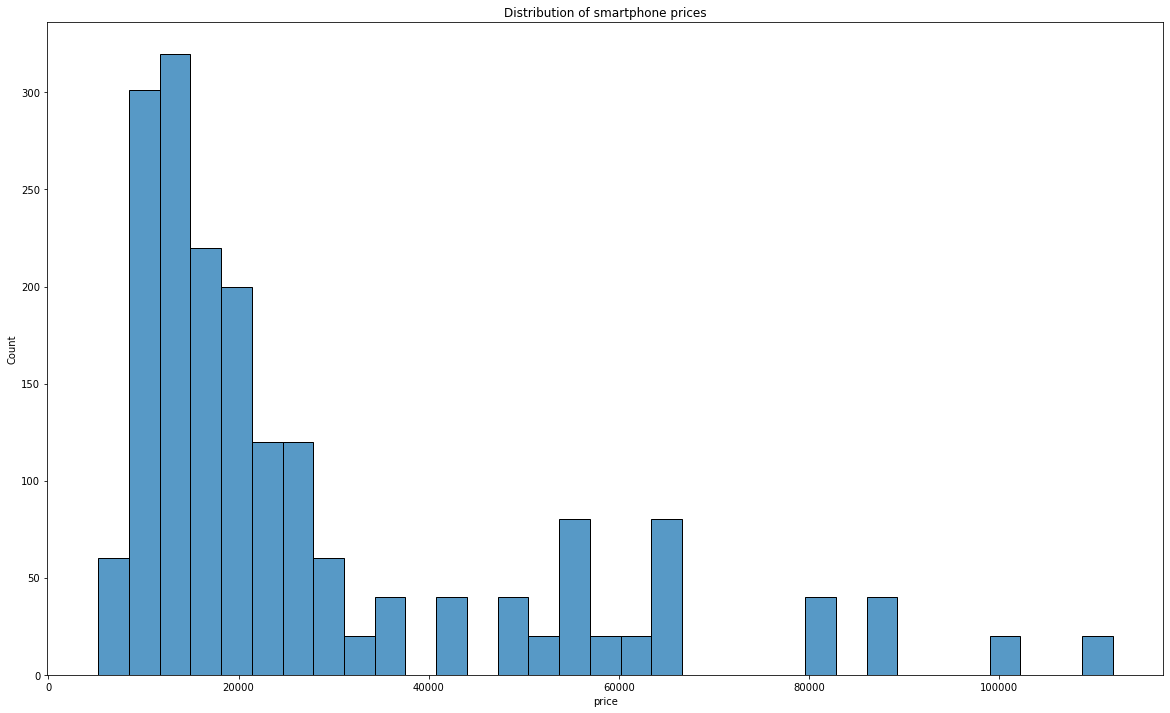

<Figure size 432x288 with 0 Axes>

In [1439]:
plt.figure(figsize=(20, 12))
sns.histplot(top['price'])
plt.title('Distribution of smartphone prices')
plt.show()
plt.clf()

The distribution is right-skewed with the majority of the data on the left, likely due to the smartphones that are entry- and mid-level, with some expensive ones in the middle, and some outliers on the right (primarily flagship phones like iPhones and Samsung Galaxy).

Now let's calculate the average price per brand.

In [1440]:
average = top.groupby('brand')['price'].mean().reset_index()
average = round(average, 2)
average

,brand,price
0,Apple,67221.78
1,IKALL,6361.50
2,Lava,10999.00
3,Oppo,17086.93
4,Redmi,14122.88
5,Samsung,17973.27
6,Vivo,16886.75
7,Xiaomi,31489.91


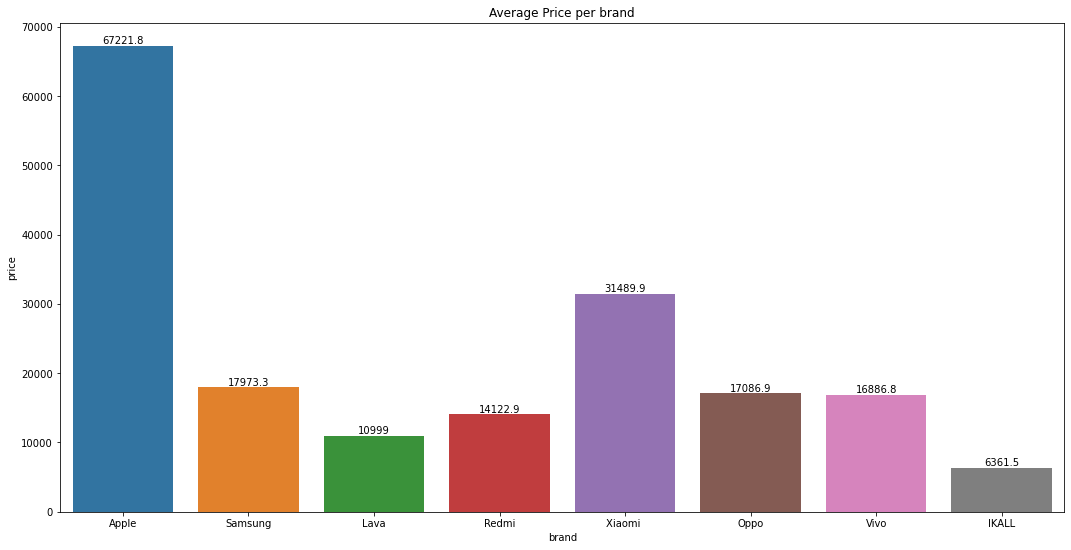

<Figure size 432x288 with 0 Axes>

In [1441]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x ='brand', y = 'price' , data = top, ci=None)
ax.bar_label(ax.containers[0])
plt.title('Average Price per brand')
plt.show()
plt.clf()

Apple smartphones are by far the most expensive, with an average price of 67,221.80 rupees, while IKALL is the least expensive, averaging 6,361.50 rupees.

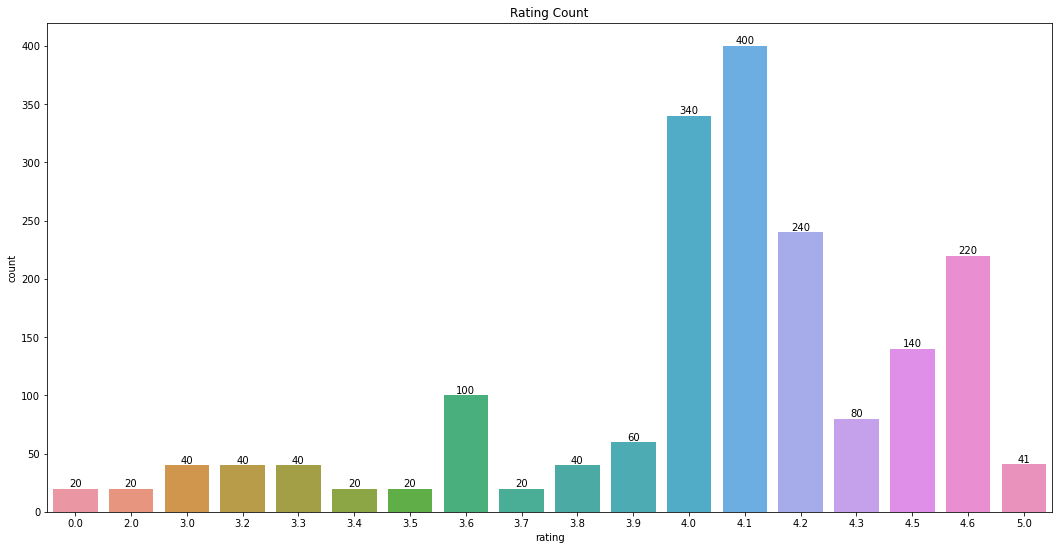

<Figure size 432x288 with 0 Axes>

In [1442]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='rating', data=top)
ax.bar_label(ax.containers[0])
plt.title("Rating Count")
plt.show()
plt.clf()

The majority of the ratings are on the high side (greater than 4 out of 5), with most phones being rated a 4.1, and some phones even receiving a rating of 5 out of 5.

Let's calculate the average rating per brand.

In [1443]:
average_rating = top.groupby('brand')['rating'].mean().reset_index()
average_rating = round(average_rating, 2)
average_rating

,brand,rating
0,Apple,4.56
1,IKALL,3.15
2,Lava,5.00
3,Oppo,4.00
4,Redmi,3.58
5,Samsung,4.03
6,Vivo,3.80
7,Xiaomi,3.83


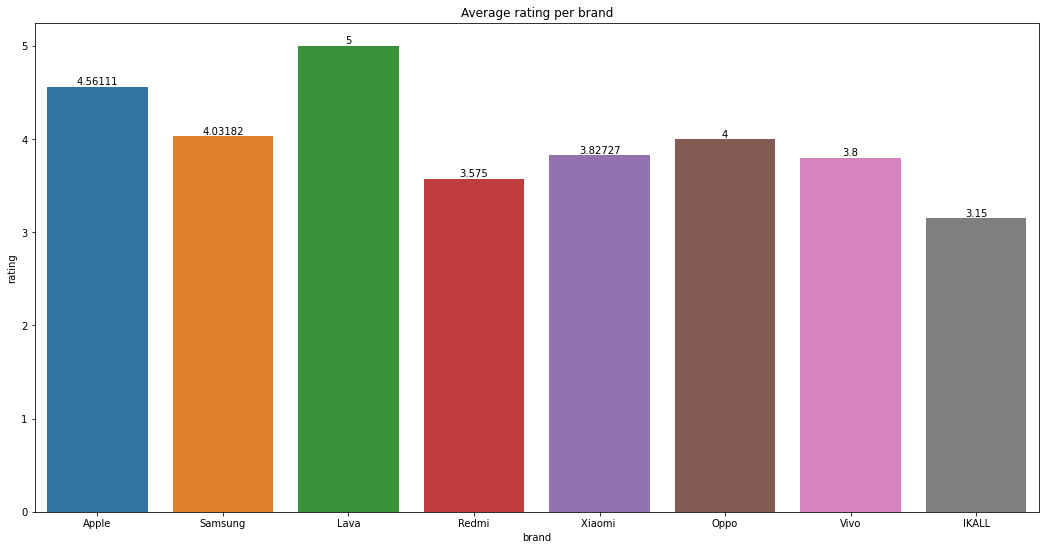

<Figure size 432x288 with 0 Axes>

In [1448]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x ='brand', y = 'rating' , data = top, ci=None)
ax.bar_label(ax.containers[0])
plt.title('Average rating per brand')
plt.show()
plt.clf()

Lava has the best average rating, with 5 out of 5, while IKALL has the lowest, with 3.15 out of 5.

Now let's see if pricing has a correlation to rating, to see if expensive phones tend to rate higher.

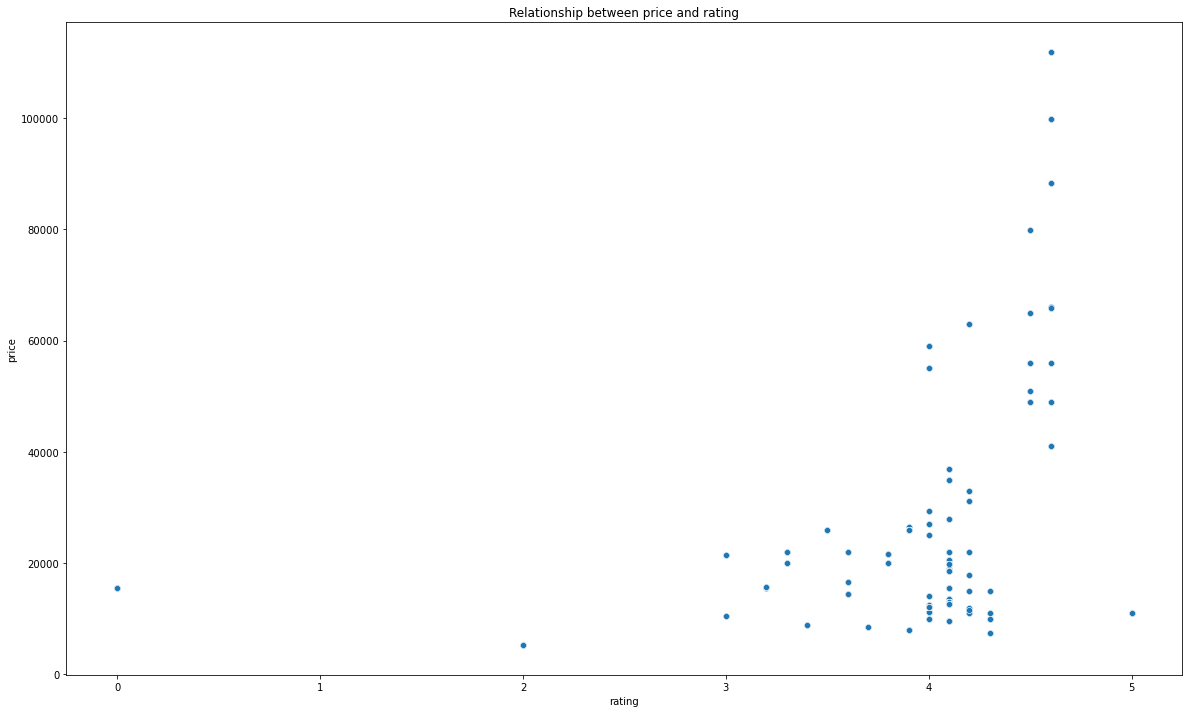

<Figure size 432x288 with 0 Axes>

In [1444]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='rating', y='price', data = top)
plt.title('Relationship between price and rating')
plt.show()
plt.clf()

It seems that apart from a few outliers, the more expensive the phone, the better the rating, meaning there is a positive correlation between pricing and rating.

In [1445]:
print(str(top.reviewcount.sum()) + ' total reviews are included in this dataset')


27751645 total reviews are included in this dataset


Now let's calculate the total reviews per brand.

In [1446]:
review = top.groupby('brand')['reviewcount'].sum().reset_index()
review

,brand,reviewcount
0,Apple,3163640
1,IKALL,180
2,Lava,205
3,Oppo,3380080
4,Redmi,11851400
5,Samsung,7474700
6,Vivo,131280
7,Xiaomi,1750160


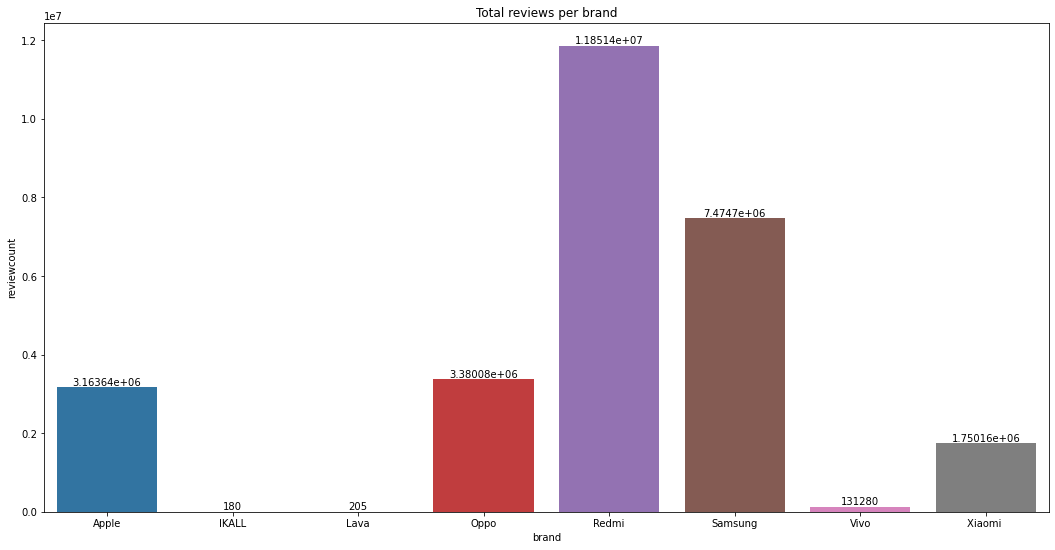

<Figure size 432x288 with 0 Axes>

In [1447]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x ='brand', y = 'reviewcount' , data = review, ci=None)
ax.bar_label(ax.containers[0])
plt.title('Total reviews per brand')
plt.show()
plt.clf()

Redmi has the most reviews by far, with 11,851,400 reviews, while IKALL has the fewest, with 180 reviews.

Let's check if there is a relationship between the number of reviews and the pricing of the smartphones.

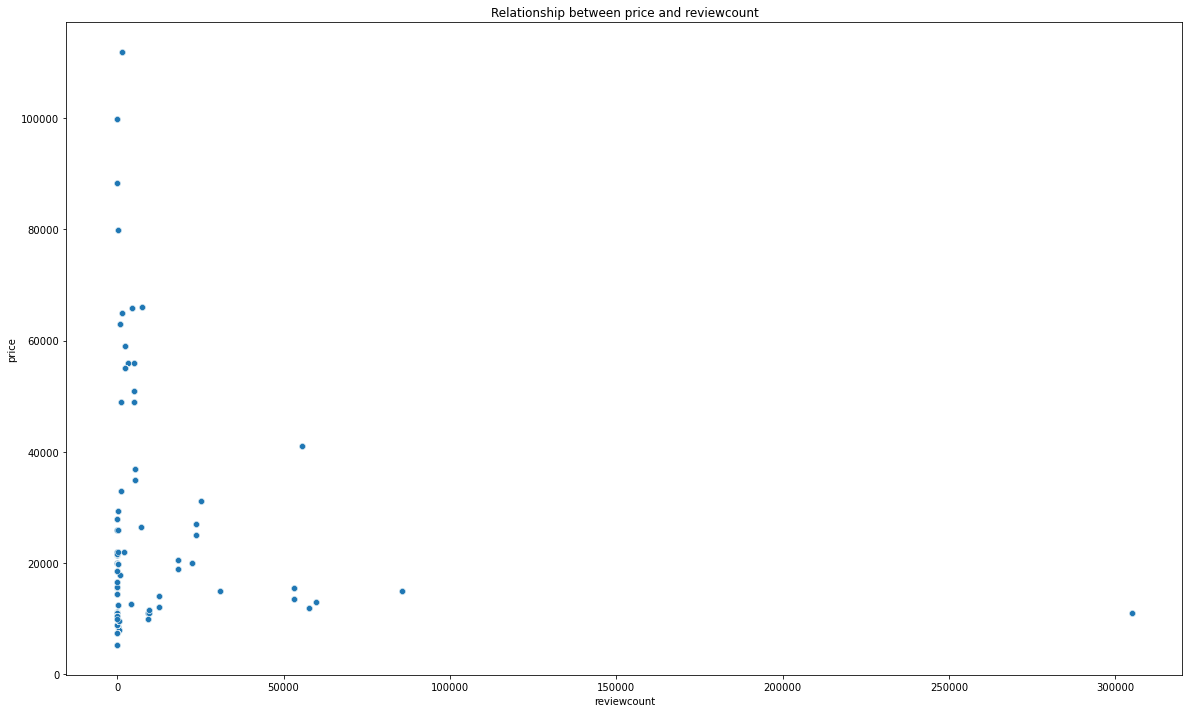

<Figure size 432x288 with 0 Axes>

In [1451]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='reviewcount', y='price', data = top)
plt.title('Relationship between price and reviewcount')
plt.show()
plt.clf()

From the graph, it looks like there is no relationship between the pricing and the review count.

Finally, we'll check if there is a relationship between the rating and the review count.

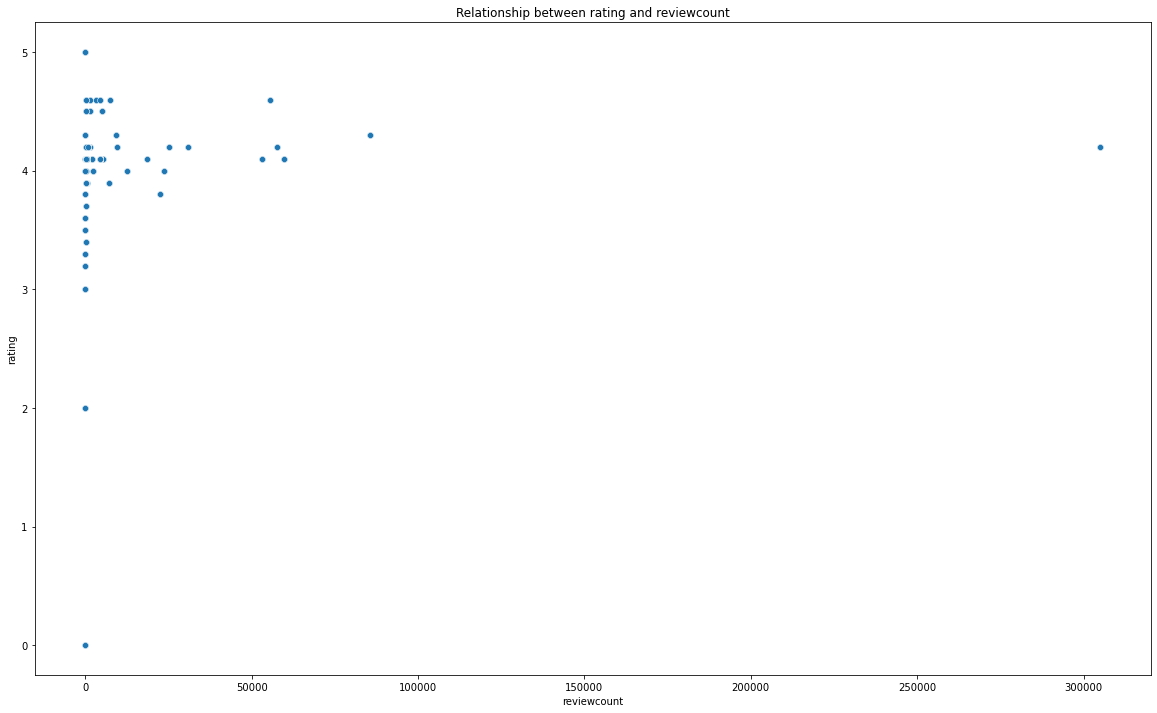

<Figure size 432x288 with 0 Axes>

In [1454]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='reviewcount', y='rating', data = top)
plt.title('Relationship between rating and reviewcount')
plt.show()
plt.clf()

It seems that there is no relationship between review count and rating.

### 3 - Conclusion

From this small datset, we can learn a few things about the top mobile brands on Amazon in India.

The dataset contains a lot of entry-level and midrange smartphone models, and a few expensive flagship models.

Samsung smartophones are the most common phones in this dataset, while Apple phones are the most expensive. Lava phones are the highest-rated with a 5 out of 5 rating, while Redmi phones have the highest number of votes, at 11,851,400.

IKALL phones are the least represtended, with the lowest rating and the lowest number of reviews, while being the cheapest of the bunch.

The smartphones usually have a high rating, with more than 4 out of 5, with some phones getting less than that.

The higher the pricing of the smartphone the higher the rating, but the the number of reviews has no effect on the rating or pricing.

This means that if a smartphone brand launches a phone in India on Amazon, it will have a better chance at selling more with a midrange phone.